## CPE 4903 HW - Logistic Regression ##
<div>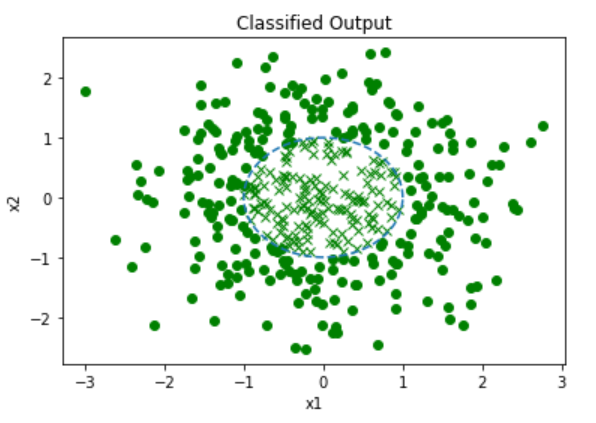<div>

The input data x1, x2, y can be loaded from file: "x1_x2_y_circle2.csv"
Work off this file to implement the back-propagation gradient for this classifier. Split the data so that you train on 80% and test with the remaining 20%. Submit the following:<br>
1. Code (with algorithm derived in class)
2. Plot of converging cost function J and final value (train data)
3. Plots of classification showing 'x's, o's, and decision boundary. Do this for both training and testing data.  
4. Compare the accuracies of training vs testing. Accuracy can be calcuated with this command:
    acc = np.mean(np.rint(A) == Y)*100
    
__Extra credit:__ 15% on separate notebook file using Keras
    
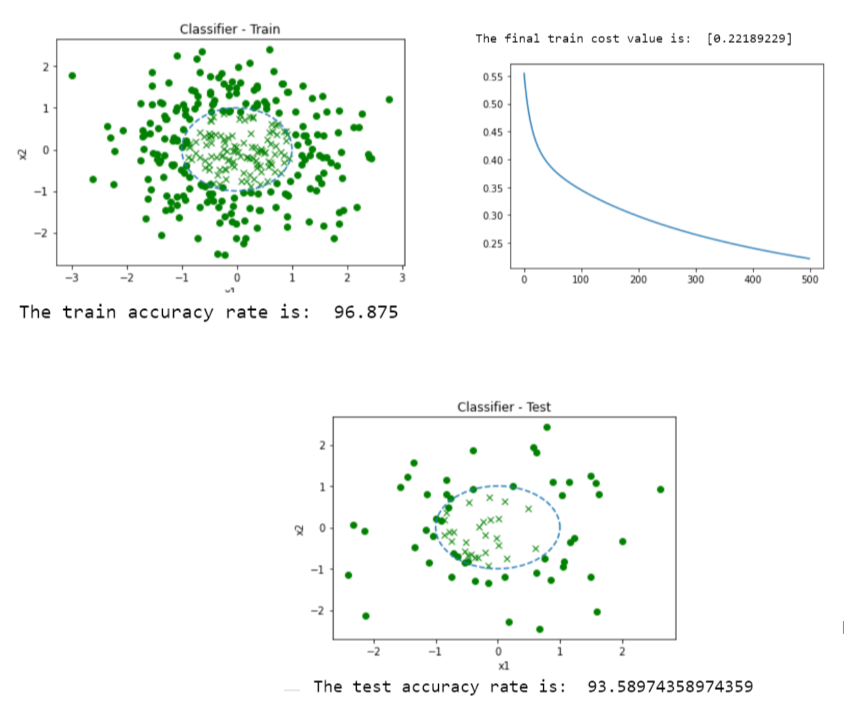


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

In [3]:
def plot_classification(X,Yhat):
    m = Yhat.shape[1]
    for i in range(m):
        if Yhat[0,i]==1:
            plt.plot(X[0,i], X[2,i], 'gx')
            #plt.legend('Exam 1')
        else:
            plt.plot(X[0,i], X[2,i], 'go')
    return


In [4]:
def plot_circle(radius):
    theta = np.linspace(0, 2*np.pi, 100)
    r = np.sqrt(radius)
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    plt.plot(x1, x2, '--')
    return

### Import data and plot ###

In [5]:
df = pd.read_csv('x1_x2_y_circle2.csv')
df=df.drop(['Unnamed: 0'],axis=1) # remove the first column
df.head()

,x1,x2,y
0,-0.947793,-1.217970,0.0
1,0.666360,1.895363,0.0
2,0.604357,-0.317137,1.0
3,-0.009871,-2.123730,0.0
4,0.442463,-0.547668,1.0


### Assignments ###

In [6]:
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
Y = np.array(df['y'])
m = len(x1) # number of samples
nx = 4 # we have 4 input features

### Plot the raw data ###

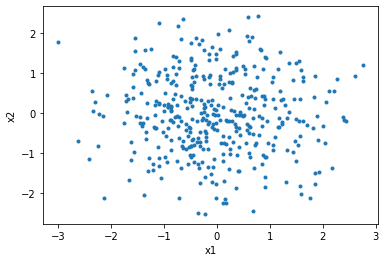

In [7]:
plt.plot(x1,x2,'.');
plt.xlabel('x1');
plt.ylabel('x2');

### Build the vectors ###

In [8]:
x1 = x1.reshape(m,1)
x2 = x2.reshape(m,1)
Y = Y.reshape(m,1)
X = np.block([x1,x1**2,x2,x2**2])

In [9]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
m_train = len(Y_train)
m_test = len(Y_test)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(320, 4)
(80, 4)
(320, 1)
(80, 1)


### Reshape the data so that it will work in the formulas ###

In [10]:
X_train = X_train.T # (nx, m)
X_test = X_test.T # (nx, m)
X = X.T
Y_train = Y_train.T
Y_test = Y_test.T

### Initialize ###

In [11]:
W = np.array([0, 0, 0, 0])
W = W.reshape(4, 1)
b = 0
Z = np.dot(W.T, X_train) + b  # Note "broadcasting" b
A = sigmoid(Z)

In [12]:
Yhat = np.rint(A)
#print(Yhat)

### Classifier befoire trained ###

Text(0.5, 1.0, 'Classifier')

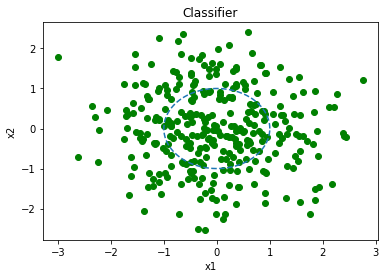

In [13]:
plot_classification(X, Yhat)
plot_circle(1)
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('Classifier')

### Train the model ###

In [14]:
alpha = 0.05
epoch = 500
W = np.array([0, 0, 0, 0])
W = W.reshape(4, 1)
b = 0

In [15]:
J = np.zeros((epoch,1))
for i in range(epoch):
    Z = np.dot(W.T,X_train) + b
    A = sigmoid(Z)
    temp1 = np.log(A)
    temp1 = np.delete(temp1,slice(1,320),axis=0) # for some reason, the A variable would become 320 x 320
    temp2 = np.log(1-A)                          # so I delected 319 rows to make it a 1 x 320
    temp2 = np.delete(temp2,slice(1,320),axis=0)
    #temp1_1 = np.dot(Y_train,temp1)
    #temp2_1 = 1 - Y_train
    #temp2_2 = np.dot(temp2_1,temp2)
    #L = -(temp1_1 + temp2_2)
    L = -(Y_train*temp1 + (1-Y_train)*temp2)
    J[i,0] = (1/m_train)*np.sum(L)
    dz = A - Y_train
    dw = (1/m_train) * np.dot(X_train, dz.T)
    db = np.sum(dz)/m_train
    W = W - alpha * dw
    b = b - alpha * db

The final cost value is: J = 0.2634639115971507


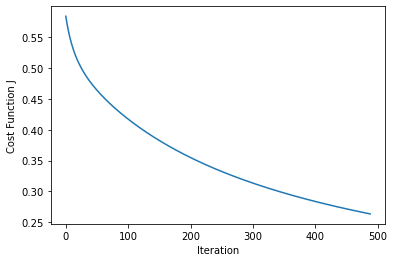

In [16]:
plt.plot(J[10:-1]); # avoid seeing initial spike that causes "zoom out" effect
plt.ylabel('Cost Function J')
plt.xlabel('Iteration')
print('The final cost value is: J =', J[-1,0])

### Output with training data ###

The train accuracy is: 100.0 %


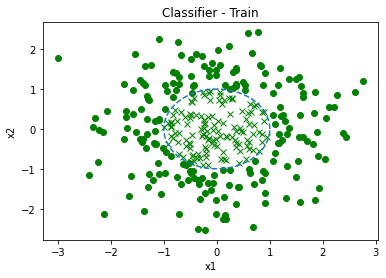

In [17]:
plot_classification(X_train, Y_train)
plot_circle(1)
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('Classifier - Train');
acc = np.mean(np.rint(A) == Y_train)*100
print('The train accuracy is:',acc,'%')

### Output with test data ###

In [18]:
Z = np.dot(W.T, X_test) + b  # Note "broadcasting" b
A = sigmoid(Z)
Yhat = np.rint(A)
alpha = 0.005
epoch = 5000

In [19]:
J = np.zeros((epoch,1))
for i in range(epoch):
    Z = np.dot(W.T,X_test) + b
    A = sigmoid(Z)
    temp1 = np.log(A)
    temp1 = np.delete(temp1,slice(1,320),axis=0) # for some reason, the A variable would become 320 x 320
    temp2 = np.log(1-A)                          # so I delected 319 rows to make it a 1 x 320
    temp2 = np.delete(temp2,slice(1,320),axis=0)
    L = -(Y_test*temp1 + (1-Y_test)*temp2)
    J[i,0] = (1/m_test)*np.sum(L)
    ### I commented the back propagation out because I figured that after I train the model, I run it on open loop. 
    ### Meaning that whatever I get is what I get and the system isn't supposed to "learn" during the test.
    #dz = A - Y_test
    #dw = (1/m_test) * np.dot(X_test, dz.T)
    #db = np.sum(dz)/m_test
    #W = W - alpha * dw
    #b = b - alpha * db

The test accuracy is: 98.75 %


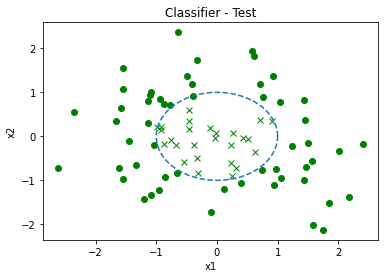

In [21]:
plot_classification(X_test, Yhat)
plot_circle(1)
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('Classifier - Test');
acc = np.mean(np.rint(A) == Y_test)*100
print('The test accuracy is:',acc,'%')